[View in Colaboratory](https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/src/Transfer_Learning_Latent_Space_Visualization_2.ipynb)

In [1]:
# Import necessary modules

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import time
import glob
import datetime

from tqdm import trange

# Import Keras modules

from keras.preprocessing import image
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model


Using TensorFlow backend.


In [2]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('gdrive/My Drive/Colab')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


['Data_', 'Model', 'Data']

In [0]:
# Set data directories

dataPath = 'gdrive/My Drive/Colab/Data'

# Changed variable names to normal and fault
# Changed variable names from folder to path
# Need to consider multiple folders
# Need to add files to be tested

# folderNormal = ['A1F1P1', 'A2F1P1', 'A1F2P1', 'A1F1P2', 'A2F2P1', 'A1F2P2', 'A2F1P2', 'A2F2P2']
folderNormal = ['A3F3P1']

folderFault = ['A3F3P5']

# for x in range(1, 6):
#     for y in range(1, 6):
#         for z in range(1, 6):
#             if (x == 5 or y == 5 or z == 5):
#                 folderFault.append('A{}F{}P{}'.format(x, y, z))


pathNormal = list()
pathFault = list()

for i in range(len(folderNormal)):
    pathNormal.append(dataPath + '/' + folderNormal[i])
    
for i in range(len(folderFault)):
    pathFault.append(dataPath + '/' + folderFault[i])

# normIdx = list()
# faultIdx = list()
# filesNormal = list()
# filesFault = list()

# for i in range(len(pathNormal)):
#     filesNormalTemp = os.listdir(pathNormal[i])
#     filesNormalTemp = [file for file in filesNormalTemp if file.endswith('.wav')]
    
#     randIdx = np.random.choice(range(1000), round(1000/len(pathNormal)), replace=False)
#     randIdx.sort()
#     normIdx.append(randIdx)
    
#     filesNormalSelected = [pathNormal[i] + '/' + filesNormalTemp[j] for j in randIdx]
    
#     filesNormal = filesNormal + filesNormalSelected
    
    
# for i in range(len(pathFault)):
#     filesFaultTemp = os.listdir(pathFault[i])
#     filesFaultTemp = [file for file in filesFaultTemp if file.endswith('.wav')]
    
#     randIdx = np.random.choice(range(1000), round(1000/len(pathFault)), replace=False)
#     randIdx.sort()
#     faultIdx.append(randIdx)
    
#     filesFaultSelected = [pathFault[i] + '/' + filesFaultTemp[j] for j in randIdx]
    
#     filesFault = filesFault + filesFaultSelected

In [0]:
# Specgram settings

nsc = 1470
nov = nsc/2
nff = nsc 
imgSize = 224

# pretrainedModel = 'VGG19'
# pretrainedModel = 'Xception'
pretrainedModel = 'ResNet50'

lastActivation = 'softmax'
sizeBatch = 16
numEpochs = 8
verb = 1


# Learning parameters

trainingRatio = 0.8

In [5]:
# Execution confirmed with new variable names

# Check whether npy file exists 

# npyNormalPath = glob.glob(pathNormal + '/' + '*.npy')

# if (len(npyNormalPath) == 1):
#     imgsNormal = np.load(npyNormalPath[0])

# else:
#     imgsNormal = np.zeros([len(filesNormal), imgSize, imgSize])
    
#     for i in trange(len(filesNormal)):
#         fs, dataInt16 = wf.read(pathNormal + '/' + filesNormal[i])
#         dataFloat = dataInt16 / (2 ** 15)
#         Pxx, _, _, _ = plt.specgram(dataFloat, NFFT=nff, Fs=fs, noverlap=nov, \
#                                            window=np.hamming(nsc), cmap='viridis')
#         plt.close()
#         imgsNormal[i, :, :] = 10 * np.log10(Pxx[0:imgSize, :])
        
#     np.save(pathNormal + '/' + folderNormal + '.npy', imgsNormal)
        
# print('Normal Image Shape: {}'.format(imgsNormal.shape))

# if len(folderNormal) == 1:
#     npyNormalPath = glob.glob(pathNormal[0] + '/' + '*.npy')
# else:
#     npyNormalPath = list()
    
# if (len(npyNormalPath) == 1):
#     imgsNormal = np.load(npyNormalPath[0])

# else:
#     imgsNormal = np.zeros([len(filesNormal), imgSize, imgSize])
    
#     for i in trange(len(filesNormal)):
#         fs, dataInt16 = wf.read(filesNormal[i])
#         dataFloat = dataInt16 / (2 ** 15)
#         Pxx, _, _, _ = plt.specgram(dataFloat, NFFT=nff, Fs=fs, noverlap=nov, \
#                                            window=np.hamming(nsc), cmap='viridis')
#         plt.close()
#         imgsNormal[i, :, :] = 10 * np.log10(Pxx[0:imgSize, :])
        
# #     np.save(pathNormal + '/' + folderNormal + '.npy', imgsNormal)
        
# print('Normal Image Shape: {}'.format(imgsNormal.shape))




startNum = 0

for i in range(startNum, len(pathNormal)):

    npyTestPath = glob.glob(pathNormal[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
    
    label = data[:, 1:5]
    
    if i == startNum:
        labelList = label
    else:
        labelList = np.vstack([labelList, label])

    print('Normal Image Shape From {}: {}'.format(pathNormal[i], data.shape))    

    
imgsNormal = imgs
normalLabel = label
    
print('Normal Image Shape: {}'.format(imgsNormal.shape))


Normal Image Shape From gdrive/My Drive/Colab/Data/A3F3P1: (1000, 5)
Normal Image Shape: (1000, 224, 224)


In [6]:
# Execution confined with new varible names

# Check whether npy file exists

# npyFaultPath = glob.glob(pathFault + '/' + '*.npy')

# if (len(npyFaultPath) == 1):
#     imgsFault = np.load(npyFaultPath[0])

# else:
#     imgsFault = np.zeros([len(filesFault), imgSize, imgSize])

#     for i in trange(len(filesFault)):
#         fs, dataInt16 = wf.read(pathFault + '/' + filesFault[i])
#         dataFloat = dataInt16 / (2 ** 15)
#         Pxx, _, _, _ = plt.specgram(dataFloat, NFFT=nff, Fs=fs, noverlap=nov, \
#                                            window=np.hamming(nsc), cmap='viridis')
#         plt.close()
#         imgsFault[i, :, :] = 10 * np.log10(Pxx[0:imgSize, :])
        
#     np.save(pathFault + '/' + folderFault + '.npy', imgsFault)
        
# print('Fault Image Shape: {}'.format(imgsFault.shape))

# if len(folderFault) == 1:
#     npyFaultPath = glob.glob(pathFault[0] + '/' + '*.npy')
# else:
#     npyFaultPath = list()

# if (len(npyFaultPath) == 1):
#     imgsFault = np.load(npyFaultPath[0])

# else:
#     imgsFault = np.zeros([len(filesFault), imgSize, imgSize])

#     for i in trange(len(filesFault)):
#         fs, dataInt16 = wf.read(filesFault[i])
#         dataFloat = dataInt16 / (2 ** 15)
#         Pxx, _, _, _ = plt.specgram(dataFloat, NFFT=nff, Fs=fs, noverlap=nov, \
#                                            window=np.hamming(nsc), cmap='viridis')
#         plt.close()
#         imgsFault[i, :, :] = 10 * np.log10(Pxx[0:imgSize, :])
        
# #     np.save(pathFault + '/' + folderFault + '.npy', imgsFault)
        
# print('Fault Image Shape: {}'.format(imgsFault.shape))

startNum = 0

for i in range(startNum, len(pathFault)):

    npyTestPath = glob.glob(pathFault[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
    
    label = data[:, 1:5]
    
    if i == startNum:
        labelList = label
    else:
        labelList = np.vstack([labelList, label])

    print('Fault Image Shape From {}: {}'.format(pathFault[i], data.shape))    

    
imgsFault = imgs
faultLabel = label
    
print('Fault Image Shape: {}'.format(imgsFault.shape))

Fault Image Shape From gdrive/My Drive/Colab/Data/A3F3P5: (1000, 5)
Fault Image Shape: (1000, 224, 224)


In [7]:
# Change name from imgsF1 or imgsF5 to imgsNormal and imgsFault

dataNumNormal = len(imgsNormal)
dataNumFault = len(imgsFault)
dataNumNormalTrain = int(dataNumNormal * trainingRatio)
dataNumFaultTrain = int(dataNumFault * trainingRatio)
dataNumNormalTest = dataNumNormal - dataNumNormalTrain
dataNumFaultTest = dataNumFault - dataNumFaultTrain

print('Normal Train:Test = {:d}:{:d}'.format(dataNumNormalTrain, dataNumNormalTest))
print('Fault  Train:Test = {:d}:{:d}\n'.format(dataNumFaultTrain, dataNumFaultTest))

trainIdxNormal = np.random.choice(dataNumNormal - 1, dataNumNormalTrain, replace=False)
testIdxNormal = list(set(range(0, dataNumNormal)) - set(trainIdxNormal))

trainImgsNormal = imgsNormal[trainIdxNormal, :, :]
testImgsNormal = imgsNormal[testIdxNormal, :, :]

print('Normal Training Image Shape {}'.format(trainImgsNormal.shape))
print('Normal Test Image Shape {}\n'.format(testImgsNormal.shape))

trainIdxFault  = np.random.choice(dataNumFault - 1, dataNumFaultTrain, replace=False)
testIdxFault = list(set(range(0, dataNumFault)) - set(trainIdxFault))

trainImgsFault = imgsFault[trainIdxFault, :, :]
testImgsFault = imgsFault[testIdxFault, :, :]

print('Fault Training Image Shape {}'.format(trainImgsFault.shape))
print('Fault Test Image Shape {}\n'.format(testImgsFault.shape))

trainImgs = np.vstack([trainImgsNormal, trainImgsFault])
testImgs = np.vstack([testImgsNormal, testImgsFault])

print('Training Image Shape {}'.format(trainImgs.shape))
print('Test Image Shape {}'.format(testImgs.shape))

Normal Train:Test = 800:200
Fault  Train:Test = 800:200

Normal Training Image Shape (800, 224, 224)
Normal Test Image Shape (200, 224, 224)

Fault Training Image Shape (800, 224, 224)
Fault Test Image Shape (200, 224, 224)

Training Image Shape (1600, 224, 224)
Test Image Shape (400, 224, 224)


In [8]:
trainMean = np.mean(trainImgs)
trainStd = np.std(trainImgs)

print('Mean of Training Image: {}'.format(trainMean))
print('Standard Deviation of Training Image: {}'.format(trainStd))

Mean of Training Image: -78.17852697578245
Standard Deviation of Training Image: 9.40198021450369


In [0]:
# Should Change Norm to Normalized

trainImgsNorm = (trainImgs - trainMean) / trainStd
testImgsNorm = (testImgs - trainMean) / trainStd

trainImgsNorm = trainImgsNorm.reshape(list(trainImgsNorm.shape) + [1])
testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

In [10]:
X_train = np.stack([trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0]], axis = -1)
X_test = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test  Shape: {}'.format(X_test.shape))

X_train Shape: (1600, 224, 224, 3)
X_test  Shape: (400, 224, 224, 3)


In [11]:
trainLabelNormal = np.stack((np.ones(dataNumNormalTrain), np.zeros(dataNumNormalTrain)), axis = -1)
testLabelNormal = np.stack((np.ones(dataNumNormalTest), np.zeros(dataNumNormalTest)), axis = -1)

trainLabelFault = np.stack((np.zeros(dataNumFaultTrain), np.ones(dataNumFaultTrain)), axis = -1)
testLabelFault = np.stack((np.zeros(dataNumFaultTest), np.ones(dataNumFaultTest)), axis = -1)

Y_train = np.vstack((trainLabelNormal, trainLabelFault))
Y_test = np.vstack((testLabelNormal, testLabelFault))

print('Y_train Normal:Fault = {:d}:{:d}'.format(len(trainLabelNormal), len(trainLabelFault)))
print('Y_test  Normal:Fault = {:d}:{:d}'.format(len(testLabelNormal), len(testLabelFault)))

Y_train Normal:Fault = 800:800
Y_test  Normal:Fault = 200:200


In [12]:
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.inception_v3 import InceptionV3

# pretrainedModel = 'ResNet50'
# lastActivation = 'softmax'
# lossFunction = 'binary_crossentropy'
# sizeBatch = 2
# numEpochs = 2
# verb = 1

# Refresh all background variables
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):
    
    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))
    
elif (pretrainedModel == 'VGG19'):
    
    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))
              
elif pretrainedModel == 'ResNet50':
    
    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))
              
elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))
    
elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))
                      
elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))
              
elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))
              
else:
    print('Invalid Pretrained Model Selection')
    
              

# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))
              
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

94658560/94653016 [==============================] - 2s 0us/step
Compiling Pretrained resnet50 Model


In [13]:
sizeBatch = 16

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

Y_pred = model.predict(X_test)

Training Pretrained resnet50 Model
Batch Size: 16	 Epochs: 8	

Train on 1600 samples, validate on 400 samples
Epoch 1/8
1600/1600 [==============================] - 75s 47ms/step - loss: 0.0927 - acc: 0.9831 - val_loss: 7.8621 - val_acc: 0.5000
Epoch 2/8
1600/1600 [==============================] - 59s 37ms/step - loss: 1.5203e-04 - acc: 1.0000 - val_loss: 0.0913 - val_acc: 0.9775
Epoch 3/8
1600/1600 [==============================] - 59s 37ms/step - loss: 1.8934e-04 - acc: 1.0000 - val_loss: 4.7080e-07 - val_acc: 1.0000
Epoch 4/8
1600/1600 [==============================] - 59s 37ms/step - loss: 0.0468 - acc: 0.9944 - val_loss: 6.6493 - val_acc: 0.5525
Epoch 5/8
1600/1600 [==============================] - 59s 37ms/step - loss: 0.0172 - acc: 0.9963 - val_loss: 0.7238 - val_acc: 0.8950
Epoch 6/8
1600/1600 [==============================] - 59s 37ms/step - loss: 0.0159 - acc: 0.9975 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 7/8
1600/1600 [==============================] - 59s 37ms/step

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
from keras.models import Model

layer_name = 'flatten_1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_test)

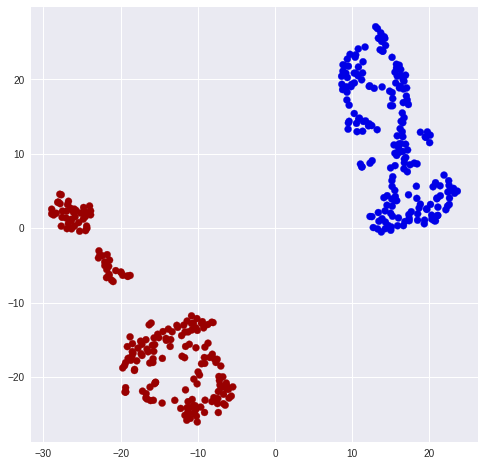

In [16]:
from sklearn.manifold import TSNE
from keras.models import Model

layer_name = 'flatten_1'
intermediate_layer_model = Model(inputs=model.input,
outputs=model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model.predict(X_test)
tsne = TSNE(n_components=2, random_state=0)
intermediates_tsne = tsne.fit_transform(intermediate_output)

Y_label = np.argmax(Y_test, axis = -1)

red = np.array([0.6, 0, 0])
blue = np.array([0, 0, 0.9])

clusterColor = [red * (1 - label) + blue * label for label in Y_label]

plt.figure(figsize=(8, 8))
plt.scatter(x = intermediates_tsne[:,0], y=intermediates_tsne[:,1], color=clusterColor)
plt.show()

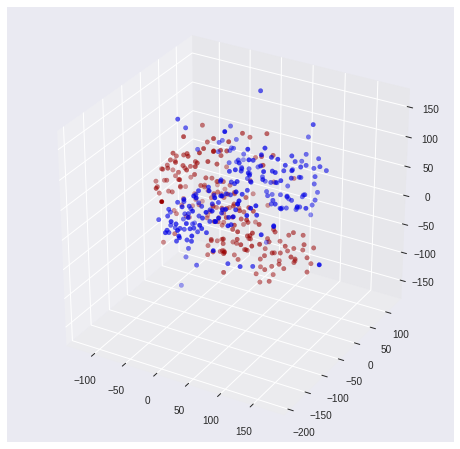

In [17]:
from sklearn.manifold import TSNE
from keras.models import Model
from mpl_toolkits.mplot3d import Axes3D



layer_name = 'flatten_1'
intermediate_layer_model = Model(inputs=model.input,
outputs=model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model.predict(X_test)
tsne = TSNE(n_components=3, random_state=0)
intermediates_tsne = tsne.fit_transform(intermediate_output)

Y_label = np.argmax(Y_test, axis = -1)

red = np.array([0.6, 0, 0])
blue = np.array([0, 0, 0.9])

clusterColor = [red * (1 - label) + blue * label for label in Y_label]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(intermediates_tsne[:,0], intermediates_tsne[:,1], intermediates_tsne[:,2], c=clusterColor)

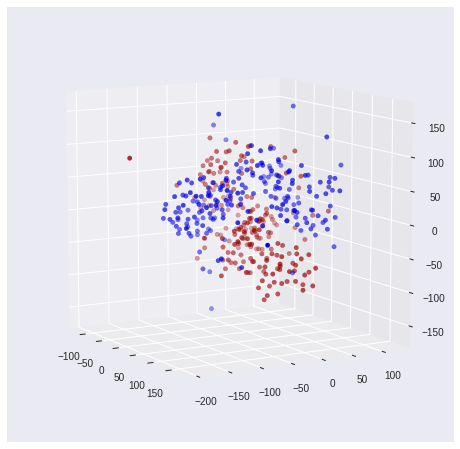

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(intermediates_tsne[:,0], intermediates_tsne[:,1], intermediates_tsne[:,2], c=clusterColor)
ax.view_init(10, -30)

In [0]:
# pathTest = list()
# folderTest = ['A3F2P3', 'A3F3P3', 'A3F4P3']

# for i in range(len(folderTest)):
#     pathTest.append(dataPath + '/' + folderTest[i])
    

# pathTests = [dataPath + '/' + folder for folder in folderTest]

# startNum = 0

# for i in range(startNum, len(pathTest)):

#     npyTestPath = glob.glob(pathTest[i] + '/' + '*Image_With_Label.npy')
#     data = np.load(npyTestPath[0])
    
#     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
    
#     label = data[:, 1:5]
    
#     if i == startNum:
#         labelList = label
#         imgsTest = imgs
#     else:
#         labelList = np.vstack([labelList, label])
#         imgsTest = np.vstack([imgsTest, imgs])
#     print('Test Image Shape From {}: {}'.format(pathTest[i], data.shape))    

    

# testLabel = labelList
    
# print('Test Image Shape: {}'.format(imgsTest.shape))

In [0]:
pathTest = list()
# folderTest = ['A3F2P3', 'A3F3P3', 'A3F4P3']
folderTest = ['A3F3P2', 'A3F3P3']

for i in range(len(folderTest)):
    pathTest.append(dataPath + '/' + folderTest[i])
    

pathTests = [dataPath + '/' + folder for folder in folderTest]

startNum = 0

for i in range(startNum, len(pathTests)):

    npyTestPath = glob.glob(pathTests[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
    
    label = data[:, 1:5]
    

    
    if i == startNum:
        labelList = label
    else:
        labelList = np.vstack([labelList, label])

    print('Test Image Shape From {}: {}'.format(folderTest[i], data.shape))    

    chunkLength = 200

    for j in range(int(len(imgs) / chunkLength)):

        imgsTestChunk = imgs[j * chunkLength:(j + 1) * chunkLength, :, :]

        testImgsNorm = (imgsTestChunk - trainMean) / trainStd

        testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

        X_test_ = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

        intermediate_features = intermediate_layer_model.predict(X_test_)
        
        intermediate_data = np.vstack([intermediate_features, intermediate_output])
        
        tsne = TSNE(n_components=2, random_state=0)
        intermediates_tsne__ = tsne._fit(intermediate_data, skip_num_points=chunkLength)
        
#         TSNE_chunk = model.predict(X_test, verbose=1)
        TSNE_chunk = intermediates_tsne__[:200, :]
    
        plt.figure(figsize=(8, 8))
        plt.scatter(x = intermediates_tsne__[200:600, 0], y=intermediates_tsne__[200:600, 1], color=clusterColor)
        plt.scatter(x = TSNE_chunk[:,0], y=TSNE_chunk[:,1], color=(0, 0.6, 0.3))
        plt.xlim([-30, 30])
        plt.ylim([-30, 30])

#         plt.figure(figsize=(8, 8))
#         plt.scatter(x = TSNE_chunk[:,0], y=TSNE_chunk[:,1])
        plt.show()

        if j == 0:
            TSNE_result_ = TSNE_chunk
        else:
            TSNE_result_ = np.vstack((TSNE_result_, TSNE_chunk))
    
    if i == startNum:
        TSNE_result = TSNE_result_
    else:
        TSNE_result = np.vstack((TSNE_result, TSNE_result_))
        
    print('Predicted {}/{}'.format(i, len(pathTests)))    
    print('TSNE_result Shape{}'.format(TSNE_result.shape))
    print('labelList Shape{}'.format(labelList.shape))
    
    del imgs, data

[0.83942723 0.07413163]
[909.2364  270.20108]


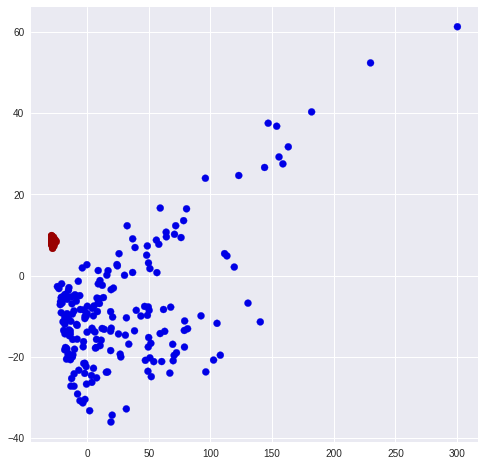

In [34]:
import numpy as np
from sklearn.decomposition import PCA

layer_name = 'flatten_1'
intermediate_layer_model = Model(inputs=model.input,
outputs=model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model.predict(X_test)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(intermediate_output)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

red = np.array([0.6, 0, 0])
blue = np.array([0, 0, 0.9])

clusterColor = [red * (1 - label) + blue * label for label in Y_label]

plt.figure(figsize=(8, 8))
plt.scatter(x = pca_result[:, 0], y=pca_result[:, 1], color=clusterColor)
plt.show()

(400, 2)

Test Image Shape From A3F3P2: (1000, 5)


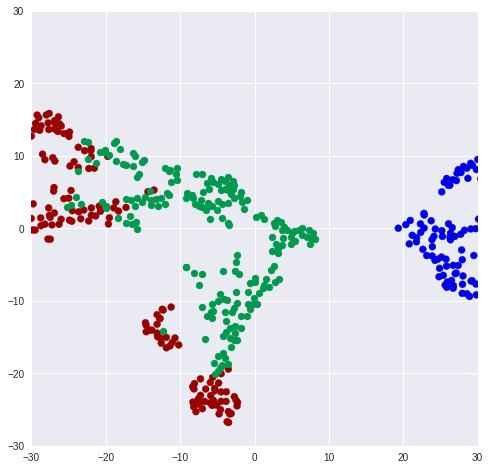

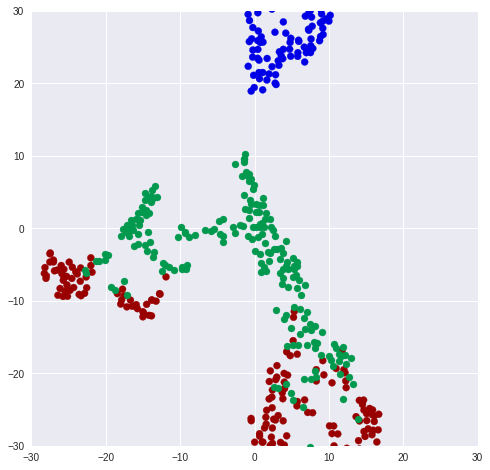

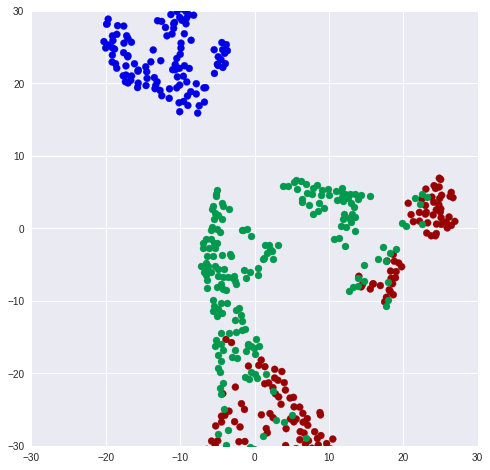

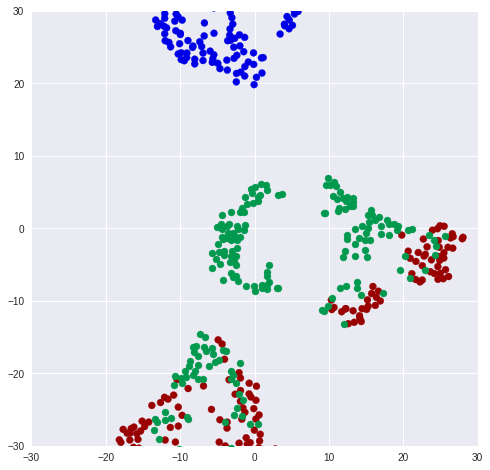

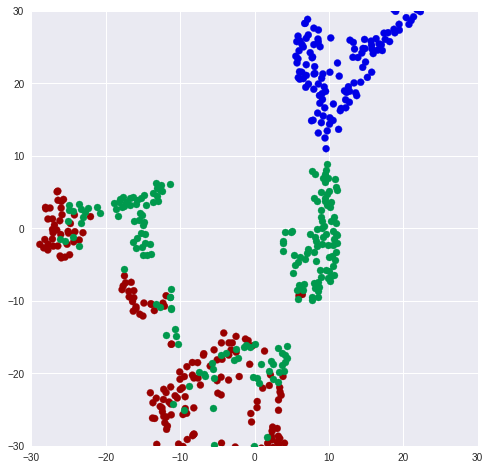

Predicted 0/2
TSNE_result Shape(1000, 2)
labelList Shape(1000, 4)
Test Image Shape From A3F3P3: (1000, 5)


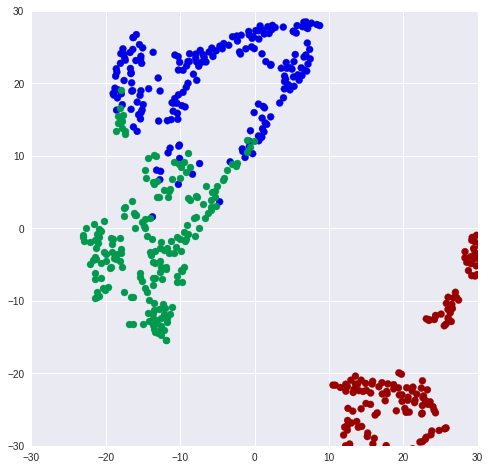

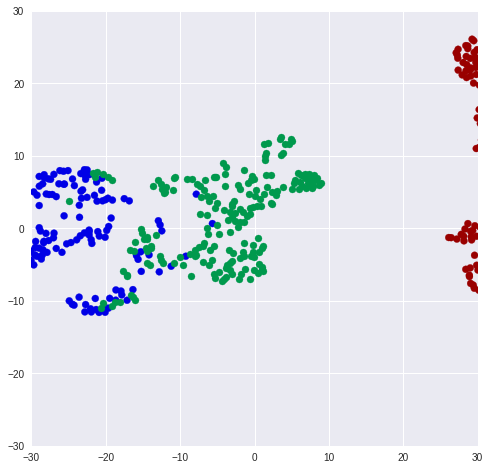

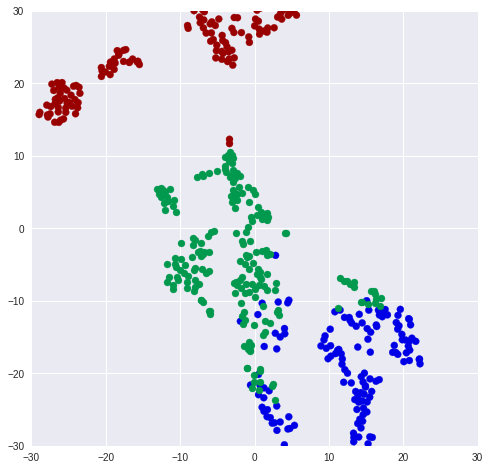

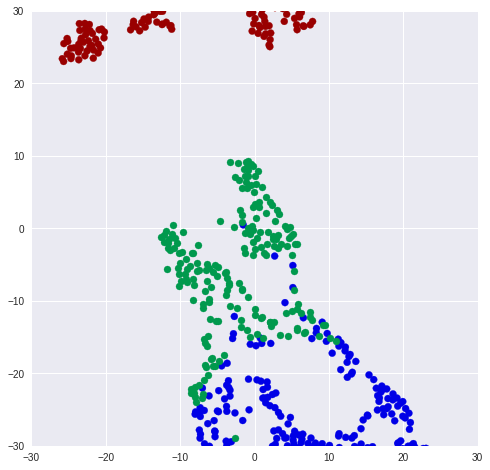

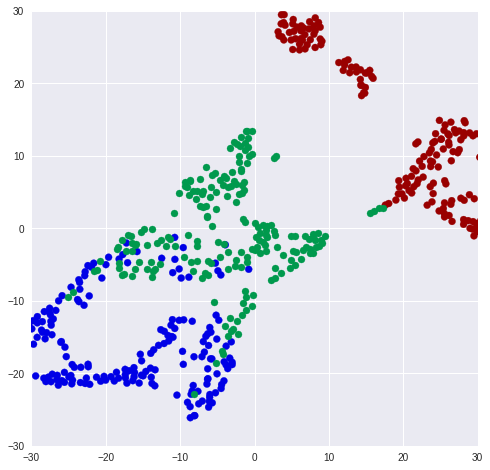

Predicted 1/2
TSNE_result Shape(2000, 2)
labelList Shape(2000, 4)


In [24]:
pathTest = list()
# folderTest = ['A3F2P3', 'A3F3P3', 'A3F4P3']
folderTest = ['A3F3P2', 'A3F3P3']

for i in range(len(folderTest)):
    pathTest.append(dataPath + '/' + folderTest[i])
    

pathTests = [dataPath + '/' + folder for folder in folderTest]

startNum = 0

for i in range(startNum, len(pathTests)):

    npyTestPath = glob.glob(pathTests[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
    
    label = data[:, 1:5]
    

    
    if i == startNum:
        labelList = label
    else:
        labelList = np.vstack([labelList, label])

    print('Test Image Shape From {}: {}'.format(folderTest[i], data.shape))    

    chunkLength = 200

    for j in range(int(len(imgs) / chunkLength)):

        imgsTestChunk = imgs[j * chunkLength:(j + 1) * chunkLength, :, :]

        testImgsNorm = (imgsTestChunk - trainMean) / trainStd

        testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

        X_test_ = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

        intermediate_features = intermediate_layer_model.predict(X_test_)
        
        intermediate_data = np.vstack([intermediate_features, intermediate_output])
        
        tsne = TSNE(n_components=2, random_state=0)
        intermediates_tsne__ = tsne._fit(intermediate_data, skip_num_points=chunkLength)
        
#         TSNE_chunk = model.predict(X_test, verbose=1)
        TSNE_chunk = intermediates_tsne__[:200, :]
    
        plt.figure(figsize=(8, 8))
        plt.scatter(x = intermediates_tsne__[200:600, 0], y=intermediates_tsne__[200:600, 1], color=clusterColor)
        plt.scatter(x = TSNE_chunk[:,0], y=TSNE_chunk[:,1], color=(0, 0.6, 0.3))
        plt.xlim([-30, 30])
        plt.ylim([-30, 30])

#         plt.figure(figsize=(8, 8))
#         plt.scatter(x = TSNE_chunk[:,0], y=TSNE_chunk[:,1])
        plt.show()

        if j == 0:
            TSNE_result_ = TSNE_chunk
        else:
            TSNE_result_ = np.vstack((TSNE_result_, TSNE_chunk))
    
    if i == startNum:
        TSNE_result = TSNE_result_
    else:
        TSNE_result = np.vstack((TSNE_result, TSNE_result_))
        
    print('Predicted {}/{}'.format(i, len(pathTests)))    
    print('TSNE_result Shape{}'.format(TSNE_result.shape))
    print('labelList Shape{}'.format(labelList.shape))
    
    del imgs, data

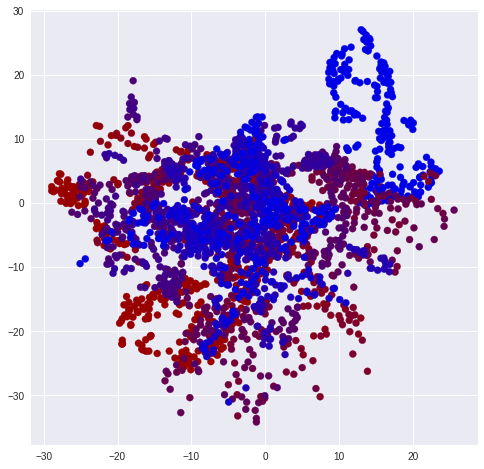

In [21]:
from sklearn.manifold import TSNE
from keras.models import Model

layer_name = 'flatten_1'
intermediate_layer_model = Model(inputs=model.input,
outputs=model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model.predict(X_test)
tsne = TSNE(n_components=2, random_state=0)
intermediates_tsne = tsne.fit_transform(intermediate_output)

Y_label = np.argmax(Y_test, axis = -1)

red = np.array([0.6, 0, 0])
blue = np.array([0, 0, 0.9])

clusterColor = [red * (1 - label) + blue * label for label in Y_label]
clusterColor_ = [red * (1 - i/len(TSNE_result)) + blue * i/len(TSNE_result) for i in range(len(TSNE_result))]

plt.figure(figsize=(8, 8))
plt.scatter(x = intermediates_tsne[:,0], y=intermediates_tsne[:,1], color=clusterColor)
plt.scatter(x = TSNE_result[:,0], y=TSNE_result[:,1], color=clusterColor_)

plt.show()

In [0]:
red = np.array([0.6, 0, 0])
blue = np.array([0, 0, 0.9])



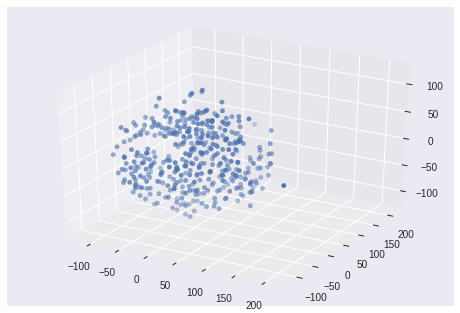

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(intermediates_tsne[:,0], intermediates_tsne[:,1], intermediates_tsne[:,2])


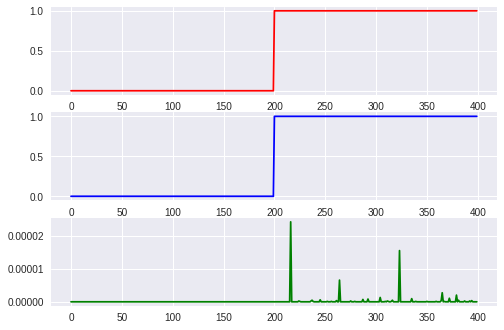

In [0]:
Y_pred = model.predict(X_test)

plt.subplot(3, 1, 1)
plt.plot(Y_test[:, 1], 'r')

plt.subplot(3, 1, 2)
plt.plot(Y_pred[:, 1], 'b')

plt.subplot(3, 1, 3)
plt.plot(Y_test[:, 1] - Y_pred[:, 1], 'g')

plt.show()

In [0]:
now = datetime.datetime.now()

# modelSaved = '{}-{}_{}_{}.h5'.format(folderNormal, folderFault, pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))

modelSaved = '{}-{}_{}_{}.h5'.format('Normal', 'Fault', pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))
meanSaved = 'mean_{}.npy'.format(now.strftime('%m-%d-%H:%M:%S'))
stdSaved = 'std_{}.npy'.format(now.strftime('%m-%d-%H:%M:%S'))

inputStr = input('''Save Model as '{}'? (y/n)\n'''.format(modelSaved))

if (inputStr == 'y' or inputStr == 'Y'):  
    model.save('gdrive/My Drive/Colab/Model/{}'.format(modelSaved))
    np.save('gdrive/My Drive/Colab/Model/{}'.format(meanSaved), trainMean)
    np.save('gdrive/My Drive/Colab/Model/{}'.format(stdSaved), trainStd)

Save Model as 'Normal-Fault_Xception_10-15-06:35:24.h5'? (y/n)
y
